<a href="https://colab.research.google.com/github/amrahmani/ML/blob/main/Ch9_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 1**: Fit **K-means clustering** with k=4 to the following dataset:

https://github.com/amrahmani/ML/blob/main/mobile_data.csv

Compare clusters with the real 'price_range' categories using metrics such as accuracy and adjusted Rand index (price_range has four classes).

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, confusion_matrix, accuracy_score

# Load the dataset
url = 'https://raw.githubusercontent.com/amrahmani/ML/main/mobile_data.csv'
df = pd.read_csv(url)

# Define features and target
X = df[['battery_power', 'clock_speed', 'dual_sim', 'int_memory', 'n_cores', 'px_height', 'px_width', 'ram', 'touch_screen', 'wifi']]
# X = df[['battery_power', 'int_memory', 'px_height', 'px_width', 'ram']]
y = df['price_range']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 1: Data Preprocessing (Standardize the features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: K-Means Clustering for k=4
# n_init=10: Run the algorithm 10 times, max_iter=300: Maximum 300 iterations
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_train_scaled)

# it assigns the predicted cluster labels to a variable y_train_pred
y_train_pred = kmeans.labels_

# Step 3: Silhouette Score for k=4
silhouette_avg = silhouette_score(X_train_scaled, y_train_pred)
print(f'Silhouette Score for k=4: {silhouette_avg}')

# Step 4: Compare Clustering Results with Real Price Range Classifications

# Adjusted Rand Index to compare clustering with real classes
ari = adjusted_rand_score(y_train, y_train_pred)
print(f'Adjusted Rand Index (ARI): {ari}')

# Confusion matrix
conf_matrix = confusion_matrix(y_train, y_train_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Accuracy Score
accuracy = accuracy_score(y_train, y_train_pred)
print(f'Accuracy Score: {accuracy}')


Silhouette Score for k=4: 0.08940698031138487
Adjusted Rand Index (ARI): 0.007121958544412378
Confusion Matrix:
[[ 45 129  67 108]
 [ 74  91  85 104]
 [ 69 102  77 104]
 [ 88  69  96  92]]
Accuracy Score: 0.21785714285714286


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


**Problem 2:** For Problem 1, use the Elbow Method to find the optimal K.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

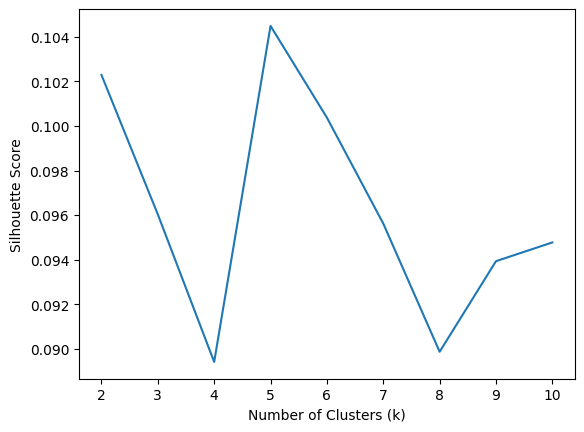

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for optimal k (5): 0.1044950247559806
Adjusted Rand Index (ARI): 0.008955192255120467
Confusion Matrix:
[[76 81 72 89 31]
 [79 81 63 65 66]
 [78 63 72 68 71]
 [58 73 73 43 98]
 [ 0  0  0  0  0]]
Accuracy Score: 0.19428571428571428


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, confusion_matrix, accuracy_score

# Load the dataset
url = 'https://raw.githubusercontent.com/amrahmani/ML/main/mobile_data.csv'
df = pd.read_csv(url)

# Define features and target
X = df[['battery_power', 'clock_speed', 'dual_sim', 'int_memory', 'n_cores', 'px_height', 'px_width', 'ram', 'touch_screen', 'wifi']]
# X = df[['battery_power', 'int_memory', 'px_height', 'px_width', 'ram']]
y = df['price_range']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 1: Data Preprocessing (Standardize the features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Elbow Method for finding optimal K**
silhouette_scores = []
for k in range(2, 11):  # Try a range of k values (2 to 10)
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    silhouette_score_k = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_score_k)

# Plot the silhouette scores vs k (optional)
import matplotlib.pyplot as plt
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

# Find the index of the maximum silhouette score (highest k value)
max_silhouette_index = np.argmax(silhouette_scores)
optimal_k = max_silhouette_index + 2  # Add 2 to account for the starting range (2)

# Step 2: K-Means Clustering with optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_train_scaled)

# Cluster labels for training set
y_train_pred = kmeans.labels_

# Step 3: Silhouette Score for optimal K
silhouette_avg = silhouette_score(X_train_scaled, y_train_pred)
print(f'Silhouette Score for optimal k ({optimal_k}): {silhouette_avg}')

# Step 4: Compare Clustering Results with Real Price Range Classifications

# Adjusted Rand Index to compare clustering with real classes
ari = adjusted_rand_score(y_train, y_train_pred)
print(f'Adjusted Rand Index (ARI): {ari}')

# Confusion matrix
conf_matrix = confusion_matrix(y_train, y_train_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Accuracy Score
accuracy = accuracy_score(y_train, y_train_pred)
print(f'Accuracy Score: {accuracy}')

**Problem 3**: Fit **Hierarchical Agglomerative Clustering** to the following dataset:

https://github.com/amrahmani/ML/blob/main/mobile_data.csv

Compare clusters with the real 'price_range' categories using metrics such as accuracy and adjusted Rand index (price_range has four classes).

Silhouette Score for Hierarchical Clustering (k=4): 0.06339131797317107
Adjusted Rand Index (ARI): 0.004953536425933026
Confusion Matrix:
[[157  58  51  83]
 [133  66  79  76]
 [133  74  70  75]
 [102  72  93  78]]
Accuracy Score: 0.265


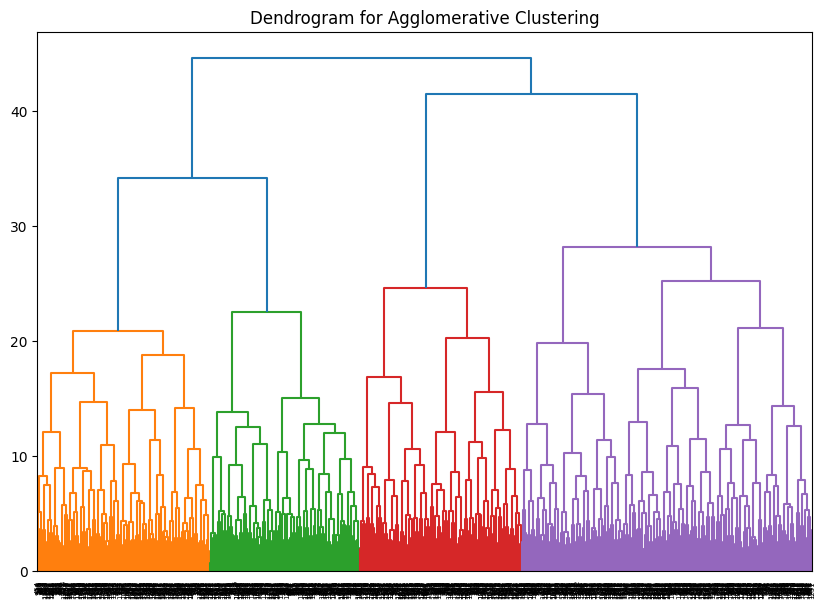

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, confusion_matrix, accuracy_score
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/amrahmani/ML/main/mobile_data.csv'
df = pd.read_csv(url)

# Define features and target
X = df[['battery_power', 'clock_speed', 'dual_sim', 'int_memory', 'n_cores', 'px_height', 'px_width', 'ram', 'touch_screen', 'wifi']]
y = df['price_range']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 1: Data Preprocessing (Standardize the features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Hierarchical Agglomerative Clustering
# We'll start by using Ward's method to minimize variance within clusters
# n_clusters=4,  # Form 4 clusters
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_train_pred = hc.fit_predict(X_train_scaled)

# Step 3: Silhouette Score for Agglomerative Clustering
silhouette_avg = silhouette_score(X_train_scaled, y_train_pred)
print(f'Silhouette Score for Hierarchical Clustering (k=4): {silhouette_avg}')

# Step 4: Compare Clustering Results with Real Price Range Classifications

# Adjusted Rand Index to compare clustering with real classes
ari = adjusted_rand_score(y_train, y_train_pred)
print(f'Adjusted Rand Index (ARI): {ari}')

# Confusion matrix
conf_matrix = confusion_matrix(y_train, y_train_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Accuracy Score
accuracy = accuracy_score(y_train, y_train_pred)
print(f'Accuracy Score: {accuracy}')

# Step 5: Visualizing the Dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Agglomerative Clustering")
dend = sch.dendrogram(sch.linkage(X_train_scaled, method='ward'))
plt.show()


**Practice:**

**Task 1:** In Problem 1, experiment with different hyperparameters of KMeans().

**Task 2:** In Problem 3, experiment with different hyperparameters of AgglomerativeClustering(): `linkage`={`‘ward’, ‘complete’, ‘average’, ‘single’`}, `metric`={`'l1', 'l2', 'manhattan', 'cosine'`}

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

**Task 3**: Find a suitable clustering dataset on Kaggle, apply Agglomerative clustering to it, and evaluate the model's performance.